# Potential approach to tranport network analysis

**initialize system** 

* **Step 1:** define nodes and edges of network + vessels in the system (location, origin, destination)

**for each timestep** 

    * shortest distance
    * lowest cost
    * least amount of time
    * lowest CO2 footprint
    * nicest scenery
    * largest loading capacity (no depth restrictions, no height restrictions)
    * fastest sailing speed (vessel speed, current speed)

* **Step 2:** assign weights to edges based on some kind of criterion
    
**NB:** the network can change for each timestep (changing waterlevels, closures, traffic)

    * currents
    * changing waterlevels
    * likely traffic related delays
    * likely infrastructure related delays (locks, bridges)

**for each vessel**

* **Step 3:** For each vessel check the shortest path based on weights assigned

* **Step 4:** For each vessel select its preferred route in case of multiple paths of equal wheight

* **Step 5:** Send vessel on its way for 1 timestep and repeat (sailing speed times timestep is distance)

This procedure will move vessels through the system. Per edge it should be possible to see how many vessels are in it. This will be a matter of postprocessing. I think it should be possible to incorporate such a network weighting routine in a simpy simulation, which could then also simulate queueing. 

Questions:
* what is my best departure time if I want to take the largest amount of cargo?
* which route is most likely to be the fastest
* which will be the busiest parts of the network

## basic imports

In [22]:
# import json
import networkx as nx

## instantiate graph object

In [23]:
# initialise graph object
G = nx.Graph()

## define nodes

In [24]:
# sketch of example graph
#
#  1:       o--o
#          /    \
#  0:  o--o      o--o
#          \    /
# -1:       o--o
#
#      1  2 3  4 5  6

# define and add nodes
G.add_node("a", pos=(1, 0))
G.add_node("b", pos=(2, 0))
G.add_node("c", pos=(3, -1))
G.add_node("d", pos=(3, 1))
G.add_node("e", pos=(4, -1))
G.add_node("f", pos=(4, 1))
G.add_node("g", pos=(5, 0))
G.add_node("h", pos=(6, 0))

## define edges

In [25]:
# define wheighted edges (from, to, weight)
e = [("a", "b", 1), 
    ("b", "c", 1), 
    ("b", "d", 2), 
    ("c", "e", 4), 
    ("d", "f", 2), 
    ("e", "g", 1), 
    ("f", "g", 2), 
    ("g", "h", 1),
    ("a", "h", 8)]

# add weighted edges
G.add_weighted_edges_from(e)

## draw graph

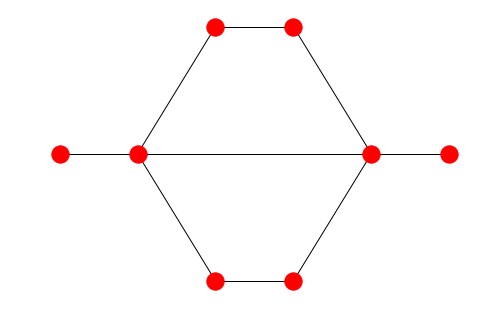

In [26]:
nx.draw(G,nx.get_node_attributes(G, 'pos'))

In [27]:
labels = nx.get_edge_attributes(G,'weight')
print(labels)

{('a', 'b'): 1, ('a', 'h'): 8, ('b', 'c'): 1, ('b', 'd'): 2, ('c', 'e'): 4, ('d', 'f'): 2, ('e', 'g'): 1, ('f', 'g'): 2, ('g', 'h'): 1}


{'a': Text(1,0,'a'),
 'b': Text(2,0,'b'),
 'c': Text(3,-1,'c'),
 'd': Text(3,1,'d'),
 'e': Text(4,-1,'e'),
 'f': Text(4,1,'f'),
 'g': Text(5,0,'g'),
 'h': Text(6,0,'h')}

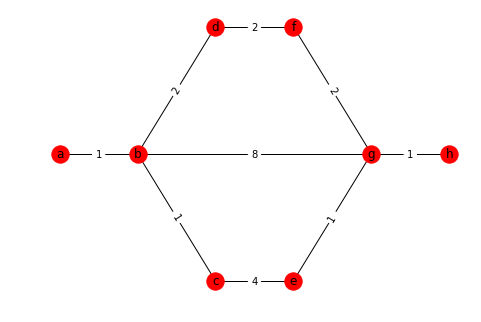

In [28]:
nx.draw(G,nx.get_node_attributes(G, 'pos'))
nx.draw_networkx_edge_labels(G,nx.get_node_attributes(G, 'pos'),edge_labels=labels)
nx.draw_networkx_labels(G,nx.get_node_attributes(G, 'pos'))

## list shortest paths
Shortest path(s) based on weight factors

In [29]:
shortest_path_generator = nx.all_shortest_paths(G, "a", "h", weight="weight")
list(shortest_path_generator)

[['a', 'h'], ['a', 'b', 'd', 'f', 'g', 'h'], ['a', 'b', 'c', 'e', 'g', 'h']]

## get Dijkstra path
Shortes path based on weight, but only returns one

In [30]:
print(nx.dijkstra_path(G, "a", "h", weight='weight'))

['a', 'h']


# Waterlevel on a river

## nodes

In [49]:
import numpy as np

def get_values_from_node(F, prop):
    """extract info from nodes"""
    values=[]
    for key, value in F.nodes(prop):
        values = np.append(values, value)

    return values

def get_min_depth(F):
    """extract bed and waterlvl info from nodes and 
    find the minimum depth"""
    bed = get_values_from_node(F, 'bed')
    waterlvl = get_values_from_node(F, 'waterlvl')
    depth = waterlvl-bed

    return np.min(depth)

In [50]:
# initialise grid (100 km in steps of 10 km)
x = range(0, 100000, 10000)

In [51]:
# initialise graph object
F = nx.Graph()

In [52]:
# add nodes with bed and waterlevels
bed = -5
waterlvl = 0
for val in x:
    F.add_node("x=" + str(val), pos=(val, 0), bed=bed, waterlvl=waterlvl)
    bed = bed + 0.5
    waterlvl = waterlvl + 0.5 + np.sin(val* np.pi*10E8) 

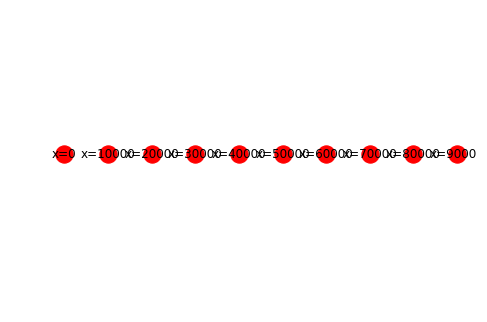

In [53]:
nx.draw(F,nx.get_node_attributes(F, 'pos'))
labels = nx.get_edge_attributes(F,'weight')
nx.draw_networkx_edge_labels(F,nx.get_node_attributes(F, 'pos'),edge_labels=labels)
nx.draw_networkx_labels(F,nx.get_node_attributes(F, 'pos'));

In [54]:
min_depth = get_min_depth(F)
min_depth

4.975264888343132